In [1]:
%matplotlib inline


# Modeling quasi-seasonal trends with date features



Some trends are common enough to appear seasonal, yet sporadic enough that
approaching them from a seasonal perspective may not be valid. An example of
this is the `"end-of-the-month" effect <https://robjhyndman.com/hyndsight/monthly-seasonality/>`_.
In this example, we'll explore how we can create meaningful features that
express seasonal trends without needing to fit a seasonal model.

.. raw:: html

   <br/>



Automatically created module for IPython interactive environment
pmdarima version: 2.0.3


c:\Users\ghild\anaconda3\envs\TimeSeries\lib\site-packages\pmdarima\utils\visualization.py:220: FutureWarning: the 'unbiased' keyword is deprecated, use 'adjusted' instead.
  res = tsaplots.plot_acf(


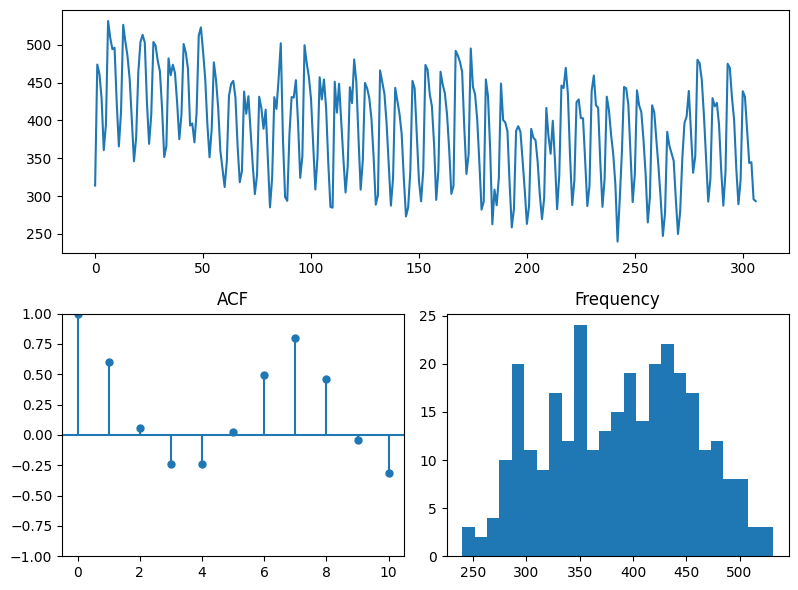

Head of generated X features:
   DATE-WEEKDAY-0  DATE-WEEKDAY-1  DATE-WEEKDAY-2  DATE-WEEKDAY-3  \
0               0               1               0               0   
1               0               0               1               0   
2               0               0               0               1   
3               0               0               0               0   
4               0               0               0               0   

   DATE-WEEKDAY-4  DATE-WEEKDAY-5  DATE-WEEKDAY-6  DATE-DAY-OF-MONTH  
0               0               0               0                  1  
1               0               0               0                  2  
2               0               0               0                  3  
3               1               0               0                  4  
4               0               1               0                  5  
Performing stepwise search to minimize aic
Near non-invertible roots for order (2, 1, 2)(0, 0, 0, 0); setting score to inf (at le

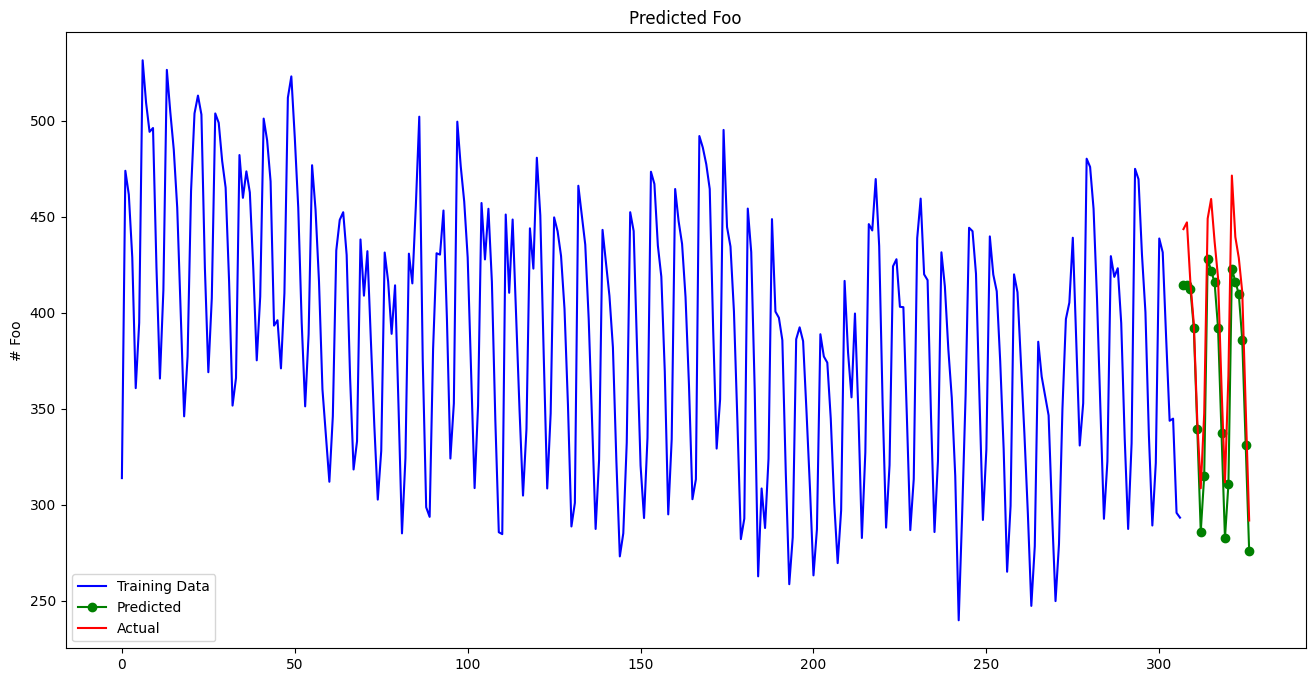

In [2]:
print(__doc__)

# Author: Taylor Smith <taylor.smith@alkaline-ml.com>

import pmdarima as pm
from pmdarima import arima
from pmdarima import model_selection
from pmdarima import pipeline
from pmdarima import preprocessing
from pmdarima.datasets._base import load_date_example

import numpy as np
from matplotlib import pyplot as plt

print(f"pmdarima version: {pm.__version__}")

# Load the data and split it into separate pieces
y, X = load_date_example()
y_train, y_test, X_train, X_test = \
    model_selection.train_test_split(y, X, test_size=20)

# We can examine traits about the time series:
pm.tsdisplay(y_train, lag_max=10)

# We can see the ACF increases and decreases rather rapidly, which means we may
# need some differencing. There also does not appear to be an obvious seasonal
# trend.
n_diffs = arima.ndiffs(y_train, max_d=5)

# Here's what the featurizer will create for us:
date_feat = preprocessing.DateFeaturizer(
    column_name="date",  # the name of the date feature in the X matrix
    with_day_of_week=True,
    with_day_of_month=True)

_, X_train_feats = date_feat.fit_transform(y_train, X_train)
print(f"Head of generated X features:\n{repr(X_train_feats.head())}")

# We can plug this X featurizer into a pipeline:
pipe = pipeline.Pipeline([
    ('date', date_feat),
    ('arima', arima.AutoARIMA(d=n_diffs,
                              trace=3,
                              stepwise=True,
                              suppress_warnings=True,
                              seasonal=False))
])

pipe.fit(y_train, X_train)

# Plot our forecasts
forecasts = pipe.predict(X=X_test)

fig = plt.figure(figsize=(16, 8))
ax = fig.add_subplot(1, 1, 1)

n_train = y_train.shape[0]
x = np.arange(n_train + forecasts.shape[0])

ax.plot(x[:n_train], y_train, color='blue', label='Training Data')
ax.plot(x[n_train:], forecasts, color='green', marker='o',
        label='Predicted')
ax.plot(x[n_train:], y_test, color='red', label='Actual')
ax.legend(loc='lower left', borderaxespad=0.5)
ax.set_title('Predicted Foo')
ax.set_ylabel('# Foo')

plt.show()

# What next? Try combining different featurizers in your pipeline to enhance
# a model's predictive power.

In [3]:
print(__doc__)

# Author: Taylor Smith <taylor.smith@alkaline-ml.com>

import pmdarima as pm
from pmdarima import arima
from pmdarima import model_selection
from pmdarima import pipeline
from pmdarima import preprocessing
from pmdarima.datasets._base import load_date_example

import numpy as np
from matplotlib import pyplot as plt

print(f"pmdarima version: {pm.__version__}")

Automatically created module for IPython interactive environment
pmdarima version: 2.0.3


In [4]:
# Load the data and split it into separate pieces
y, X = load_date_example()
y_train, y_test, X_train, X_test = \
    model_selection.train_test_split(y, X, test_size=20)

In [5]:
y

0      313.8
1      474.0
2      461.6
3      428.9
4      360.7
       ...  
322    439.5
323    428.6
324    410.8
325    350.6
326    291.7
Name: y, Length: 327, dtype: float64

In [6]:
X

,date
0,2019-01-01
1,2019-01-02
2,2019-01-03
3,2019-01-04
4,2019-01-05
...,...
322,2019-11-19
323,2019-11-20
324,2019-11-21
325,2019-11-22


c:\Users\ghild\anaconda3\envs\TimeSeries\lib\site-packages\pmdarima\utils\visualization.py:220: FutureWarning: the 'unbiased' keyword is deprecated, use 'adjusted' instead.
  res = tsaplots.plot_acf(


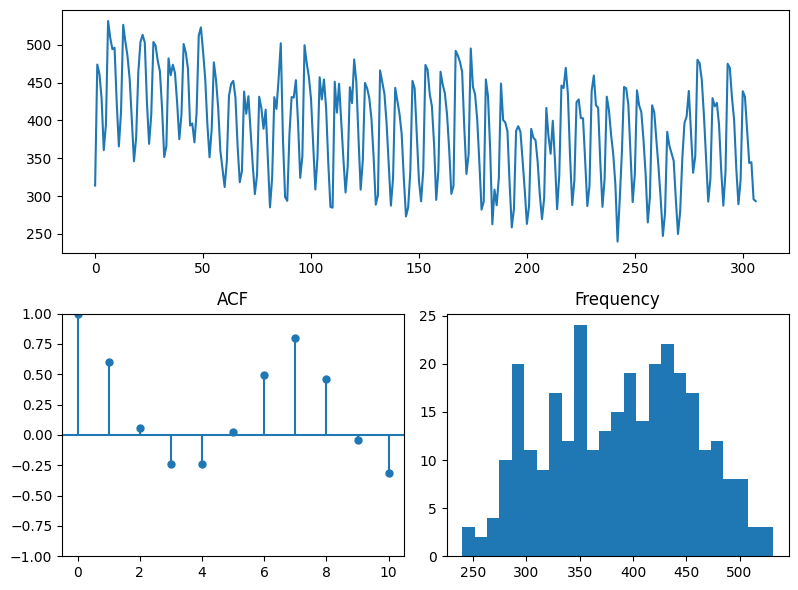

In [7]:
# We can examine traits about the time series:
pm.tsdisplay(y_train, lag_max=10)

In [8]:
# We can see the ACF increases and decreases rather rapidly, which means we may
# need some differencing. There also does not appear to be an obvious seasonal
# trend.
n_diffs = arima.ndiffs(y_train, max_d=5)

In [9]:
# No of differencing required.
n_diffs 

1

In [10]:
# Here's what the featurizer will create for us:
date_feat = preprocessing.DateFeaturizer(
    column_name="date",  # the name of the date feature in the X matrix
    with_day_of_week=True,
    with_day_of_month=True)

In [12]:
date_feat

DateFeaturizer(column_name='date')